<a href="https://colab.research.google.com/github/fxop0218/PyTorchForBeginners/blob/main/04_ComputerVision_CNN_Beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Buildinf a CNN (Convolution Neuronal Network)

**🟦EN**:
* CNN's also known as ConvNets
* CNN's are know gor their capabilities to find patterns on visual data
* To understand how works visit this page [CNN, visual exemple](https://poloclub.github.io/cnn-explainer/)

**🟥ES**:
* CNN también conocidas como ConvNets
* Las CNN son conocidas por su capacidad para encontrar patrones en datos visuales.
* Para entender mejor como funciona, visitar esta pagina [Ejemplo visual de CNN](https://poloclub.github.io/cnn-explainer/)

In [ ]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Imports
import torch
import torchvision
import matplotlib.pyplot as plt
from torch import nn
from torchvision import datasets, transforms, models
from torchvision.transforms import ToTensor

print(f"torch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

torch version: 1.13.0+cu116
torchvision version: 0.14.0+cu116


## 1. Getting a dataset

**🟦EN**: The dataset we will use will be the one from FashionMNIST

**🟥ES**: El primer set de datos que utilizaremos sera el de FashionMNIST

In [ ]:
# Setup
train_data = datasets.FashionMNIST(
    root = "data", # The downloaded data is stored in
    train = True, 
    download = True, # True if want to download and false if not
    transform = ToTensor(), # How do we want to transform the data?
    target_transform=None # How dow we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform=None
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
device = "gpu" if torch.cuda.is_available else "cpu"

In [ ]:
print(f"Train length: {len(train_data)} || Test length: {len(test_data)}")

Train length: 60000 || Test length: 10000


In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
classes = train_data.classes
classes_id = train_data.class_to_idx
# print(f"All classes names: {classes}")
print(f"All classes with their id's: {classes_id}")

All classes with their id's: {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [ ]:
print(f"Image shape: {image.shape}[color chanel, heigth, width]\n")

Image shape: torch.Size([1, 28, 28])[color chanel, heigth, width]



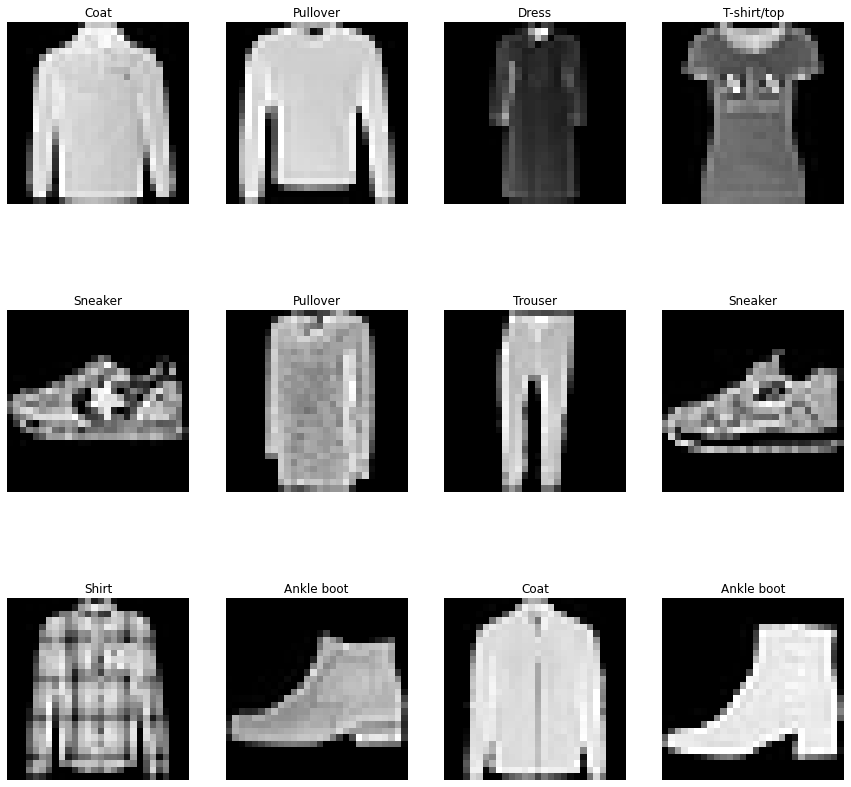

In [ ]:
torch.manual_seed(10)

fig = plt.figure(figsize=(15, 15))
row = 3
col = 4

for i in range(1, row * col+1):
  random_index = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_index]
  fig.add_subplot(row, col, i)
  plt.title(classes[label])
  plt.imshow(img.squeeze(), cmap="gray")
  plt.axis(False)

## 2. Prepare DataLoader

**🟦EN**:  Data is in the form of PyTorch Datasets.

DataLoader transform our dataset into Pyton iterable

We want to turn our data into batches. 

Why would we do this??

1. It is more computationally efficient, as in, your computign hardware may not be able to llok at 6000 image in one hit. So we break it down to 32 images at a tiem (Batch size = 32)

2. It gives out neuronal network more chances to update its gradients per epochs.

**🟥ES**: Los datos están en forma de PyTorch Datasets.

DataLoader transforma nuestro dataset en iterable Pyton

Queremos convertir nuestros datos en lotes. 

¿Por qué haríamos esto?

1. Es más eficiente computacionalmente, como en, su hardware computign puede no ser capaz de llok en 6000 imagen en un hit. Así que lo dividimos en 32 imágenes a la vez (tamaño del lote = 32)

2. Esto da a nuestra red neuronal más oportunidades de actualizar sus gradientes por lote. 

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# DataSet into iterable
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)
print(f"Train DataLoader: {train_dataloader} Test dataloader: {test_dataloader}")
print(f"Length of train DataLoader: {len(train_dataloader)} with batch = {BATCH_SIZE}\nLength of test DataLoader {len(test_dataloader)} with batch = {BATCH_SIZE}")

Train DataLoader: <torch.utils.data.dataloader.DataLoader object at 0x7f5d19552b80> Test dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7f5d19552af0>
Length of train DataLoader: 1875 with batch = 32
Length of test DataLoader 313 with batch = 32


In [ ]:
# Check dataloader

train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(f"Train features batch shape: {train_features_batch.shape}\ntrain labels bartch shape: {train_labels_batch.shape}")

Train features batch shape: torch.Size([32, 1, 28, 28])
train labels bartch shape: torch.Size([32])


Image size: torch.Size([1, 28, 28]) || Label: 0, label size: torch.Size([])


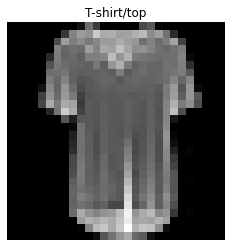

In [ ]:
# Show exemple

random_index = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_index], train_labels_batch[random_index]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(classes[label])
plt.axis(False)

print(f"Image size: {img.shape} || Label: {label}, label size: {label.shape}")

## 3. Build model

**🟦EN**: In the next model, we see 2 new type of layers, Conv2d and Maxpool2d
* [*Conv2d*](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html): Applies a 2D convolution over an input signal composed of several input planes.
* [*Maxpool2d*](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html): Applies a 2D max pooling over an input signal composed of several input planes.

**🟥ES**: En el siguiente modelo, vemos 2 nuevos tipos de capas, Conv2d y Maxpool2d
* [*Conv2d*](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html): Aplica una convolución 2D sobre una señal de entrada compuesta por varios planos de entrada.
* [*Maxpool2d*](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html): Aplica un maxpooling 2D sobre una señal de entrada compuesta de varios planos de entrada.

In [20]:
class FashionModelCNNV1(nn.Module):
  def __init__(self,
               input_shape: int,
               output_shape: int,
               hidden_lay: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_lay,
                  kernel_size=3,
                  stride=1,
                  padding=1), # Values we can set outselcen in our NN's
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_lay,
                  out_channels=hidden_lay,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_lay,
                  out_channels=hidden_lay,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_lay,
                  out_channels=hidden_lay,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classificator_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_lay*0,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    print(f"First conv block X shape: {x.shape}")
    
    x = self.conv_block_2(x)
    print(f"Second conv block X shape: {x.shape}")
    return self.classificator_layer(x)
    # return self.classificator_layer(self.conv_block_2(self.conv_block_1(x)))


In [16]:
INPUT = len(train_features_batch[1][0][0]) * len(train_features_batch[1][0][1])
OUTPUT = len(classes)

print(f"Input size: {INPUT} || Output: {OUTPUT}")

Input size: 784 || Output: 10


In [21]:
torch.manual_seed(10)
torch.cuda.manual_seed(10)

model_v1 = FashionModelCNNV1(input_shape=1,
                             output_shape=OUTPUT,
                             hidden_lay=20)

/usr/local/lib/python3.8/dist-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


**🟦EN**:

**🟥ES**:

**🟦EN**:

**🟥ES**:

**🟦EN**:

**🟥ES**:

**🟦EN**:

**🟥ES**:

**🟦EN**:

**🟥ES**: